[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\badr0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\badr0\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\badr0\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Accuracy: 0.83
Confusion Matrix:
[[168  33]
 [ 35 164]]


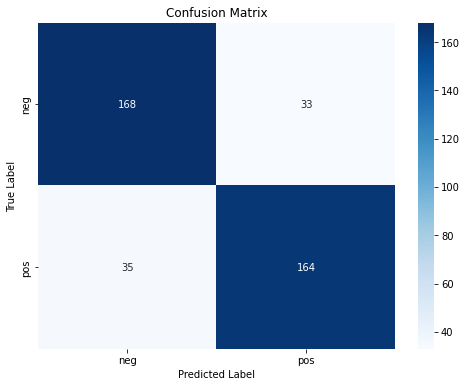

Tuned Model Accuracy: 0.83
Tuned Model Confusion Matrix:
[[168  33]
 [ 35 164]]


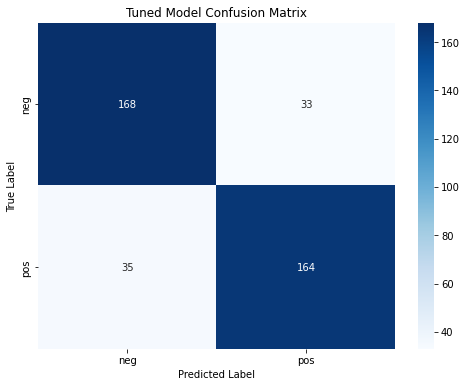

In [30]:
import os
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# # Download NLTK resources if not already downloaded
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# Initialize stemmer and lemmatizer
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]
    # Join tokens back into a single string
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

# Define a function to load text files from a directory and preprocess them
def load_text_files(directory):
    texts = []
    labels = []
    for label in ['pos', 'neg']:
        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):
            with open(os.path.join(label_dir, filename), 'r', encoding='utf-8') as file:
                text = file.read()
                preprocessed_text = preprocess_text(text)
                texts.append(preprocessed_text)
                labels.append(label)
    return texts, labels

# Assuming your positive and negative processed reviews are stored in directories 'positive' and 'negative'
data_directory = 'Dataset/txt_sentoken'
texts, labels = load_text_files(data_directory)

# Encoding labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels_encoded, test_size=0.2, random_state=42)

# Text vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Model training
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Model evaluation
y_pred = svm_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



In [21]:
import os
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Download NLTK resources if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stemmer and lemmatizer
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]
    # Join tokens back into a single string
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

# Define a function to load text files from a directory and preprocess them
def load_text_files(directory):
    texts = []
    labels = []
    for label in ['pos', 'neg']:
        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):
            with open(os.path.join(label_dir, filename), 'r', encoding='utf-8') as file:
                text = file.read()
                preprocessed_text = preprocess_text(text)
                texts.append(preprocessed_text)
                labels.append(label)
    return texts, labels

# Assuming your positive and negative processed reviews are stored in directories 'positive' and 'negative'
data_directory = 'Dataset/txt_sentoken'
texts, labels = load_text_files(data_directory)

# Encoding labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels_encoded, test_size=0.2, random_state=42)

# Text vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\badr0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\badr0\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


SVM - Training Accuracy: 98.31%      ,     Testing Accuracy: 83.00%
Naive Bayes - Training Accuracy: 92.62%      ,     Testing Accuracy: 80.75%
Logistic Regression - Training Accuracy: 96.06%      ,     Testing Accuracy: 82.50%
Random Forest - Training Accuracy: 100.00%      ,     Testing Accuracy: 77.00%
Gradient Boosting - Training Accuracy: 97.81%      ,     Testing Accuracy: 76.25%
K-Nearest Neighbors - Training Accuracy: 80.06%      ,     Testing Accuracy: 66.50%


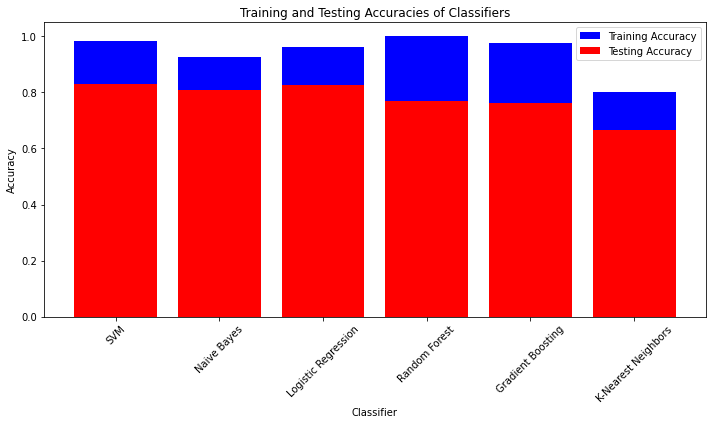

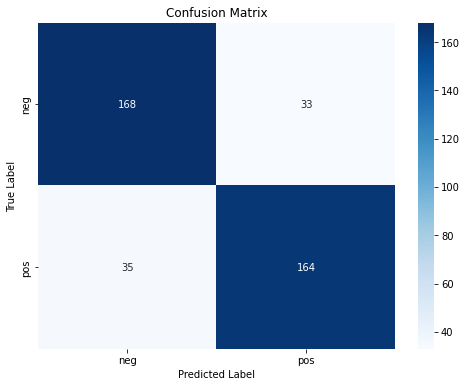

In [27]:


# Initialize classifiers
classifiers = {
    'SVM': SVC(kernel='linear'),
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate classifiers
train_accuracies = []
test_accuracies = []
for name, classifier in classifiers.items():
    classifier.fit(X_train_tfidf, y_train)
    train_accuracy = classifier.score(X_train_tfidf, y_train)
    test_accuracy = classifier.score(X_test_tfidf, y_test)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    print(f'{name} - Training Accuracy: {train_accuracy*100:.2f}%      ,     Testing Accuracy: {test_accuracy*100:.2f}%')


# Plotting the bar chart for training and testing accuracies
plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), train_accuracies, color='blue', label='Training Accuracy')
plt.bar(classifiers.keys(), test_accuracies, color='red', label='Testing Accuracy')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies of Classifiers')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting confusion matrix using SVM (best performing classifier)
best_classifier = classifiers['SVM']
y_pred = best_classifier.predict(X_test_tfidf)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/30
40/40 [==============================] - 1s 9ms/step - loss: 0.6873 - accuracy: 0.5789 - val_loss: 0.6685 - val_accuracy: 0.8062
Epoch 2/30
40/40 [==============================] - 0s 7ms/step - loss: 0.5956 - accuracy: 0.8031 - val_loss: 0.5404 - val_accuracy: 0.8219
Epoch 3/30
40/40 [==============================] - 0s 5ms/step - loss: 0.3706 - accuracy: 0.8953 - val_loss: 0.3748 - val_accuracy: 0.8687
Epoch 4/30
40/40 [==============================] - 0s 4ms/step - loss: 0.1657 - accuracy: 0.9594 - val_loss: 0.3585 - val_accuracy: 0.8500
Epoch 5/30
40/40 [==============================] - 0s 5ms/step - loss: 0.0712 - accuracy: 0.9875 - val_loss: 0.3563 - val_accuracy: 0.8625
Epoch 6/30
40/40 [==============================] - 0s 4ms/step - loss: 0.0449 - accuracy: 0.9922 - val_loss: 0.3835 - val_accuracy: 0.8531
Epoch 7/30
40/40 [==============================] - 0s 5ms/step - loss: 0.0260 - accuracy: 0.9977 - val_loss: 0.4042 - val_accuracy: 0.8500
Epoch 8/30
40/40 [==

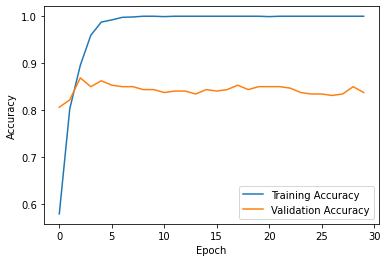

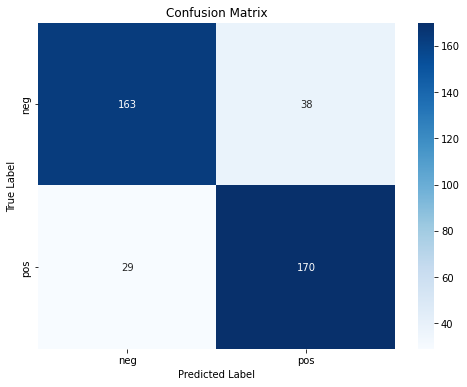

In [24]:
from tensorflow import keras
import numpy as np
# Deep Learning Model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_tfidf.toarray(), y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_tfidf.toarray(), y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix
y_pred = np.round(model.predict(X_test_tfidf.toarray())).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/30
40/40 [==============================] - 1s 10ms/step - loss: 0.6787 - accuracy: 0.6062 - val_loss: 0.6382 - val_accuracy: 0.8094
Epoch 2/30
40/40 [==============================] - 0s 4ms/step - loss: 0.4733 - accuracy: 0.8625 - val_loss: 0.3922 - val_accuracy: 0.8687
Epoch 3/30
40/40 [==============================] - 0s 4ms/step - loss: 0.1649 - accuracy: 0.9539 - val_loss: 0.3433 - val_accuracy: 0.8531
Epoch 4/30
40/40 [==============================] - 0s 4ms/step - loss: 0.0511 - accuracy: 0.9914 - val_loss: 0.3583 - val_accuracy: 0.8375
Epoch 5/30
40/40 [==============================] - 0s 5ms/step - loss: 0.0185 - accuracy: 0.9992 - val_loss: 0.4163 - val_accuracy: 0.8625
Epoch 6/30
40/40 [==============================] - 0s 5ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.4146 - val_accuracy: 0.8469
Epoch 7/30
40/40 [==============================] - 0s 5ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.4343 - val_accuracy: 0.8500
Epoch 8/30
40/40 [=

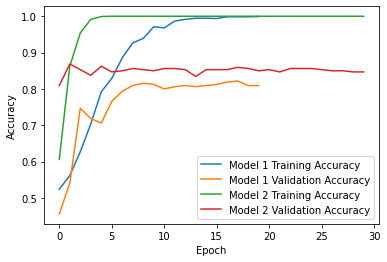

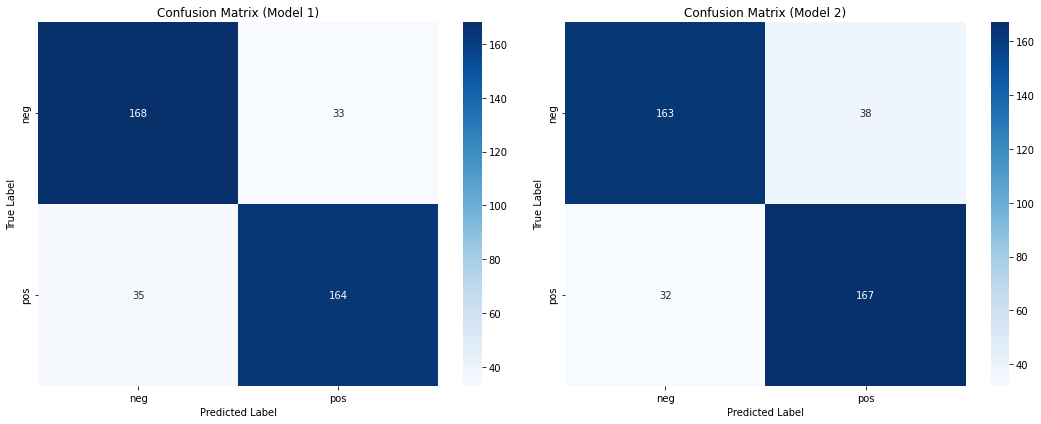

In [33]:
# Define the second deep learning model
model2 = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

# Train the second model
history2 = model2.fit(X_train_tfidf.toarray(), y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the second model
test_loss2, test_accuracy2 = model2.evaluate(X_test_tfidf.toarray(), y_test)
print(f"Test Accuracy (Model 2): {test_accuracy2 * 100:.2f}%")

# Plot training history for both models
plt.plot(history.history['accuracy'], label='Model 1 Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Model 1 Validation Accuracy')
plt.plot(history2.history['accuracy'], label='Model 2 Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Model 2 Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix for both models
y_pred2 = np.round(model2.predict(X_test_tfidf.toarray())).astype(int)
conf_matrix2 = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Model 1)')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Model 2)')

plt.tight_layout()
plt.show()


In [23]:
# Print predictions for some sample texts from the testing set
print("Sample Predictions for Testing Sentiments:")
for i in range(5):
    sample_text = X_test[i]
    sample_label = label_encoder.inverse_transform([y_test[i]])[0]
    sample_text_tfidf = tfidf_vectorizer.transform([sample_text])
    for name, classifier in classifiers.items():
        predicted_label = label_encoder.inverse_transform(classifier.predict(sample_text_tfidf))[0]
        print(f"Sample {i+1} ({sample_label}): {name} Predicted Sentiment: {predicted_label}")

# Identify the best-performing model
best_model_name = max(classifiers, key=lambda k: classifiers[k].score(X_test_tfidf, y_test))
print("\nBest Performing Model on Testing Set:", best_model_name)


Sample Predictions for Testing Sentiments:
Sample 1 (neg): SVM Predicted Sentiment: neg
Sample 1 (neg): Naive Bayes Predicted Sentiment: neg
Sample 1 (neg): Logistic Regression Predicted Sentiment: neg
Sample 1 (neg): Random Forest Predicted Sentiment: neg
Sample 1 (neg): Gradient Boosting Predicted Sentiment: neg
Sample 1 (neg): K-Nearest Neighbors Predicted Sentiment: neg
Sample 2 (pos): SVM Predicted Sentiment: pos
Sample 2 (pos): Naive Bayes Predicted Sentiment: pos
Sample 2 (pos): Logistic Regression Predicted Sentiment: pos
Sample 2 (pos): Random Forest Predicted Sentiment: neg
Sample 2 (pos): Gradient Boosting Predicted Sentiment: neg
Sample 2 (pos): K-Nearest Neighbors Predicted Sentiment: pos
Sample 3 (neg): SVM Predicted Sentiment: neg
Sample 3 (neg): Naive Bayes Predicted Sentiment: pos
Sample 3 (neg): Logistic Regression Predicted Sentiment: pos
Sample 3 (neg): Random Forest Predicted Sentiment: neg
Sample 3 (neg): Gradient Boosting Predicted Sentiment: neg
Sample 3 (neg): 